In [129]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [130]:
df1 = pd.read_csv("../data/case_claims.csv")
df1.rename(columns={df.columns[0]: 'index'}, inplace=True)
df1

,index,case_type,case_number,file_date,plaintiff,defendant,Debt Collector
0,1,Small Claims,2208SC000228,2022-10-04,"Portfolio Recovery Associates, Llc","Sical, Byron Tobias",Portfolio Recovery Associates LLC
1,2,Civil,2210CV001010,2022-10-03,"Midland Credit Management, Inc.","Williams, Hansel N.",Midland Credit Management
2,4,Small Claims,2214SC000981,2022-10-03,"Portfolio Recovery Associates, Llc","Guevara, Jomer",Portfolio Recovery Associates LLC
3,5,Civil,2215CV000887,2022-10-03,"Midland Credit Management, Inc.","Casamento, William J",Midland Credit Management
4,13,Civil,2227CV000204,2022-10-04,Velocity Investments LLC,"Rweyemamu, Judith",Velocity Investments LLC
...,...,...,...,...,...,...,...
519176,2774344,Small Claims,2467SC000228EF,2024-04-22,"Midland Credit Management, Inc","Magliaro, David",Midland Credit Management
519177,2774348,Civil,2414CV000191,2024-04-22,"Portfolio Recovery Associates, Llc","Sullivan, Lynne Anne",Portfolio Recovery Associates LLC
519178,2774349,Small Claims,2414SC000630,2024-04-22,"Portfolio Recovery Associates, Llc","Angel, Sheila",Portfolio Recovery Associates LLC
519179,2774350,Small Claims,2414SC000641,2024-04-22,"Portfolio Recovery Associates, Llc","Sandoval, Nelson",Portfolio Recovery Associates LLC


In [131]:
# database connection
cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='civica_courtdocs')

cursor = cnx.cursor()

In [132]:
query =  """
SELECT post_id, case_number
FROM wp_courtdocs.cdocs_case_meta_index
WHERE file_date >= '20130101'
"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs


In [133]:
case_ids = pd.DataFrame (results)
case_ids.to_csv('case_ids.csv', index=False)
case_ids

,0,1
0,11156,1356CV001581
1,11181,1356CV001582
2,11200,1356CV001583
3,11223,1356CV001584
4,11260,1356CV001586
...,...,...
2348107,106596186,BA24A0076SJ
2348108,106596200,BA24W0079WD
2348109,106596208,BA24W0080WD
2348110,106596218,BA24W0082WD


In [134]:
merged_df = df1.merge(case_ids, left_on='case_number', right_on=1, how='left')
merged_df.rename(columns={0: 'case_id'}, inplace=True)
merged_df.drop(columns=[1], inplace=True)
merged_df.to_csv('merged_df.csv', index=False)
df= merged_df
df

,index,case_type,case_number,file_date,plaintiff,defendant,Debt Collector,case_id
0,1,Small Claims,2208SC000228,2022-10-04,"Portfolio Recovery Associates, Llc","Sical, Byron Tobias",Portfolio Recovery Associates LLC,89009872.0
1,2,Civil,2210CV001010,2022-10-03,"Midland Credit Management, Inc.","Williams, Hansel N.",Midland Credit Management,89009882.0
2,4,Small Claims,2214SC000981,2022-10-03,"Portfolio Recovery Associates, Llc","Guevara, Jomer",Portfolio Recovery Associates LLC,89009912.0
3,5,Civil,2215CV000887,2022-10-03,"Midland Credit Management, Inc.","Casamento, William J",Midland Credit Management,89009922.0
4,13,Civil,2227CV000204,2022-10-04,Velocity Investments LLC,"Rweyemamu, Judith",Velocity Investments LLC,89010005.0
...,...,...,...,...,...,...,...,...
520351,2774349,Small Claims,2414SC000630,2024-04-22,"Portfolio Recovery Associates, Llc","Angel, Sheila",Portfolio Recovery Associates LLC,106565340.0
520352,2774350,Small Claims,2414SC000641,2024-04-22,"Portfolio Recovery Associates, Llc","Sandoval, Nelson",Portfolio Recovery Associates LLC,106565355.0
520353,2774350,Small Claims,2414SC000641,2024-04-22,"Portfolio Recovery Associates, Llc","Sandoval, Nelson",Portfolio Recovery Associates LLC,106565356.0
520354,2774355,Small Claims,2414SC000646,2024-04-22,"Capital One, N.a.","Batchelor, David E",Capital One,106565424.0


In [135]:
# query = """

# SELECT DISTINCT case_id
# FROM wp_courtdocs.cdocs_case_action_index
# WHERE action LIKE 'Judgment'
# AND description REGEXP '\\\\$[0-9]+'
# AND date_time >= CURDATE() - INTERVAL 11 YEAR
# ORDER BY case_id ASC
# """

# %time

# cursor.execute(query)

# results = cursor.fetchall()

In [136]:
# tdebt_cases= pd.DataFrame (results)
# tdebt_cases

DEFAULT CASES

In [137]:
query1 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'  -- Consider if you can use 'default%' or another more specific pattern
AND action = 'Default'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(query1) # executing query

results1 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


In [138]:
df['case_id']

0          89009872.0
1          89009882.0
2          89009912.0
3          89009922.0
4          89010005.0
             ...     
520351    106565340.0
520352    106565355.0
520353    106565356.0
520354    106565424.0
520355    106565425.0
Name: case_id, Length: 520356, dtype: float64

In [139]:
totdef= pd.DataFrame (results1)
totdef

,0
0,11156
1,11181
2,11460
3,11486
4,11596
...,...
277894,102452322
277895,102452370
277896,102452397
277897,102452434


In [140]:
debt_set = set(df['case_id'].tolist())
totdef_set=set(totdef[0].tolist())
cc_debt_totdef = totdef_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_totdef = len(totdef_set)
ncc_debt_totdef = len(cc_debt_totdef)
# print(cc_debt_def)
print("Number of total debt cases: ", ncc_debt)
print("Number of total default cases: ", ncc_totdef)
print("Number of common cases between debt and default cases: ", ncc_debt_totdef)
print("Percentage of default cases that are debt case: ", (ncc_debt_totdef/ncc_totdef)*100)


Number of total debt cases:  520356
Number of total default cases:  277899
Number of common cases between debt and default cases:  79025
Percentage of default cases that are debt case:  28.436590272005297


In [141]:
query2 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'  
AND action = 'Judgment'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(query2) # executing query

results2 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


In [142]:
defjud= pd.DataFrame (results2)
defjud

,0
0,11156
1,11181
2,11460
3,11486
4,11564
...,...
310343,102452397
310344,102452434
310345,106222400
310346,102439676


In [143]:
# debt_set = set(df['case_id'].tolist())
defjud_set=set(defjud[0].tolist())
cc_debt_defjud = defjud_set.intersection(debt_set)
# ncc_debt = len(debt_set)
ncc_defjud = len(defjud_set)
ncc_debt_defjud = len(cc_debt_defjud)
print("Number of total debt cases: ", ncc_debt)
print("Number of total default judgment cases: ", ncc_defjud)
print("Number of common cases between debt and default_judgment cases: ", ncc_debt_defjud)
print("Percentage of default_judgment cases that are debt case: ", (ncc_debt_defjud/ncc_defjud)*100)

Number of total debt cases:  520356
Number of total default judgment cases:  310348
Number of common cases between debt and default_judgment cases:  103233
Percentage of default_judgment cases that are debt case:  33.26362663848325


In [144]:
query3 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'  
AND action = 'Motion to remove default'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(query3) # executing query

results3 = cursor.fetchall() # fetching result

CPU times: user 0 ns, sys: 1e+03 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [145]:
defmotrm= pd.DataFrame (results3)
defmotrm

,0
0,11156
1,14931
2,20930
3,23274
4,27421
...,...
23609,102451302
23610,102451489
23611,102451702
23612,102451889


In [146]:
# debt_set = set(df['case_id'].tolist())
defmotrm_set=set(defmotrm[0].tolist())
cc_debt_defmotrm = defmotrm_set.intersection(debt_set)
# ncc_debt = len(debt_set)
ncc_defmotrm = len(defmotrm_set)
ncc_debt_defmotrm = len(cc_debt_defmotrm)
print("Number of total debt cases: ", ncc_debt)
print("Number of total default motion to remove cases: ", ncc_defmotrm)
print("Number of common cases between debt and default motion to remove cases: ", ncc_debt_defmotrm)
print("Percentage of default motion to remove cases that are debt case: ", (ncc_debt_defmotrm/ncc_defmotrm)*100)

Number of total debt cases:  520356
Number of total default motion to remove cases:  23614
Number of common cases between debt and default motion to remove cases:  2679
Percentage of default motion to remove cases that are debt case:  11.344964851359363


In [147]:
query4 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'  
AND action = 'Default Removed'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(query4) # executing query

results4 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


In [148]:
defrmed= pd.DataFrame (results4)
defrmed

,0
0,31528
1,34563
2,57384
3,96809
4,216498
...,...
1217,99738533
1218,99759149
1219,99878765
1220,99982144


In [149]:
# debt_set = set(df['case_id'].tolist())
defrmed_set=set(defrmed[0].tolist())
cc_debt_defrmed = defrmed_set.intersection(debt_set)
# ncc_debt = len(debt_set)
ncc_defrmed = len(defrmed_set)
ncc_debt_defrmed = len(cc_debt_defrmed)
print("Number of total debt cases: ", ncc_debt)
print("Number of total default motion to remove cases: ", ncc_defrmed)
print("Number of common cases between debt and default motion to remove cases cases: ", ncc_debt_defrmed)
print("Percentage of default motion to remove cases cases that are debt case: ", (ncc_debt_defrmed/ncc_defrmed)*100)

Number of total debt cases:  520356
Number of total default motion to remove cases:  1222
Number of common cases between debt and default motion to remove cases cases:  166
Percentage of default motion to remove cases cases that are debt case:  13.584288052373159


Percentage of Default Judgement to Default Filed:  130.63334387851947
Percentage of Motion to Remove Default to Default Filed:  3.390066434672572
Percentage of Default Removed to Default Filed:  0.21006010756089843


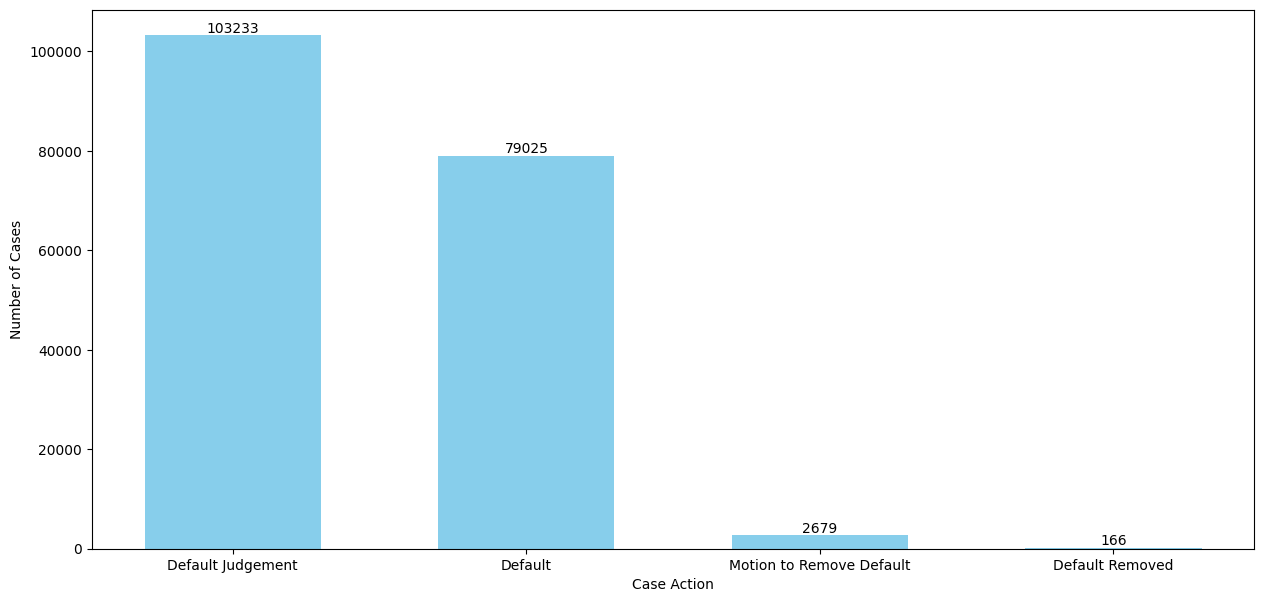

In [152]:
import numpy as np
import matplotlib.pyplot as plt

per_ncc_debt_defjud= (ncc_debt_defjud/ncc_debt_totdef)*100
per_ncc_debt_defmotrm= (ncc_debt_defmotrm/ncc_debt_totdef)*100
per_ncc_debt_defrmed= (ncc_debt_defrmed/ncc_debt_totdef)*100

print("Percentage of Default Judgement to Default Filed: ", per_ncc_debt_defjud)
print("Percentage of Motion to Remove Default to Default Filed: ", per_ncc_debt_defmotrm)
print("Percentage of Default Removed to Default Filed: ", per_ncc_debt_defrmed)

categories = ['Default Judgement', 'Default', 'Motion to Remove Default', 'Default Removed']
values = [ncc_debt_defjud, ncc_debt_totdef, ncc_debt_defmotrm, ncc_debt_defrmed]

fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(categories, values, color='skyblue', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Case Action")
plt.ylabel("Number of Cases")
plt.show()

CAPIAS CASES

In [153]:
# database connection
cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='civica_courtdocs')

cursor = cnx.cursor()

In [154]:
cquery1 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE action = 'Capias'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(cquery1) # executing query

cresults1 = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [155]:
totcap= pd.DataFrame (cresults1)
totcap

,0
0,5574
1,6558
2,7786
3,8548
4,8731
...,...
289735,102332660
289736,102332667
289737,102332674
289738,102333198


In [156]:
debt_set = set(df['case_id'].tolist())
totcap_set=set(totcap[0].tolist())
cc_debt_totcap = totcap_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_totcap = len(totcap_set)
ncc_debt_totcap = len(cc_debt_totcap)
print("Number of total debt cases: ", ncc_debt)
print("Number of total capias cases: ", ncc_totcap)
print("Number of common cases between debt and capias cases: ", ncc_debt_totcap)
print("Percentage of capias cases that are debt case: ", (ncc_debt_totcap/ncc_totcap)*100)

Number of total debt cases:  520356
Number of total capias cases:  289740
Number of common cases between debt and capias cases:  92281
Percentage of capias cases that are debt case:  31.849589286946916


In [157]:
cquery2 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE action = 'Capias returned'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(cquery2) # executing query

cresults2 = cursor.fetchall() # fetching result

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.15 µs


In [158]:
capret = pd.DataFrame (cresults2)
capret

,0
0,18754
1,33483
2,35434
3,73532
4,80565
...,...
1678,98720905
1679,98801096
1680,99572198
1681,99709551


In [159]:
debt_set = set(df['case_id'].tolist())
capret_set=set(capret[0].tolist())
cc_debt_capret = capret_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_capret = len(capret_set)
ncc_debt_capret = len(cc_debt_capret)
print("Number of total debt cases: ", ncc_debt)
print("Number of capias returned cases: ", ncc_capret)
print("Number of common cases between debt and capias returned cases: ", ncc_debt_capret)
print("Percentage of capias returned cases that are debt case: ", (ncc_debt_capret/ncc_capret)*100)

Number of total debt cases:  520356
Number of capias returned cases:  1683
Number of common cases between debt and capias returned cases:  611
Percentage of capias returned cases that are debt case:  36.30421865715983


In [160]:
cquery3 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE action = 'Capias returned unserved'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(cquery3) # executing query

cresults3 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


In [161]:
capretuns = pd.DataFrame (cresults3)
capretuns

,0
0,14465
1,15703
2,16944
3,17287
4,17428
...,...
8218,93350942
8219,93359187
8220,93513203
8221,89409161


In [162]:
debt_set = set(df['case_id'].tolist())
capretuns_set=set(capretuns[0].tolist())
cc_debt_capretuns = capretuns_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_capretuns = len(capretuns_set)
ncc_debt_capretuns = len(cc_debt_capretuns)
print("Number of total debt cases: ", ncc_debt)
print("Number of total capias unserved cases: ", ncc_capretuns)
print("Number of common cases between debt and capias unserved cases: ", ncc_debt_capretuns)
print("Percentage of capias unserved cases that are debt case: ", (ncc_debt_capretuns/ncc_capretuns)*100)

Number of total debt cases:  520356
Number of total capias unserved cases:  8223
Number of common cases between debt and capias unserved cases:  2124
Percentage of capias unserved cases that are debt case:  25.82998905508938


In [163]:
cquery4 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%capias%'
AND action = 'Case inactivated'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(cquery4) # executing query

cresults4 = cursor.fetchall() # fetching result

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.91 µs


In [164]:
capinact = pd.DataFrame (cresults4)
capinact

,0
0,423129
1,429142
2,803472
3,989847
4,1899833
5,2096783
6,2106699
7,2162932
8,2263945
9,2343987


In [165]:
debt_set = set(df['case_id'].tolist())
capinact_set=set(capinact[0].tolist())
cc_debt_capinact = capinact_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_capinact = len(capinact_set)
ncc_debt_capinact = len(cc_debt_capinact)
print("Number of total debt cases: ", ncc_debt)
print("Number of  capias inactive cases: ", ncc_capinact)
print("Number of common cases between debt and capias inactive cases: ", ncc_debt_capinact)
print("Percentage of capias cases that are debt case: ", (ncc_debt_capinact/ncc_capinact)*100)

Number of total debt cases:  520356
Number of  capias inactive cases:  35
Number of common cases between debt and capias inactive cases:  16
Percentage of capias cases that are debt case:  45.714285714285715


In [166]:
cquery5 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE action = 'Capias expired'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(cquery5) # executing query

cresults5 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs


In [167]:
capexp = pd.DataFrame (cresults5)
capexp

,0
0,7621
1,7723
2,7981
3,8182
4,8548
...,...
21384,100047548
21385,100049165
21386,100055972
21387,100059873


In [168]:
debt_set = set(df['case_id'].tolist())
capexp_set=set(capexp[0].tolist())
cc_debt_capexp = capexp_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_capexp = len(capexp_set)
ncc_debt_capexp = len(cc_debt_capexp)
print("Number of total debt cases: ", ncc_debt)
print("Number of capias expired cases: ", ncc_capexp)
print("Number of common cases between debt and capias expired cases: ", ncc_debt_capexp)
print("Percentage of capias expired cases that are debt case: ", (ncc_debt_capexp/ncc_capexp)*100)

Number of total debt cases:  520356
Number of capias expired cases:  21389
Number of common cases between debt and capias expired cases:  3270
Percentage of capias expired cases that are debt case:  15.288232268923279


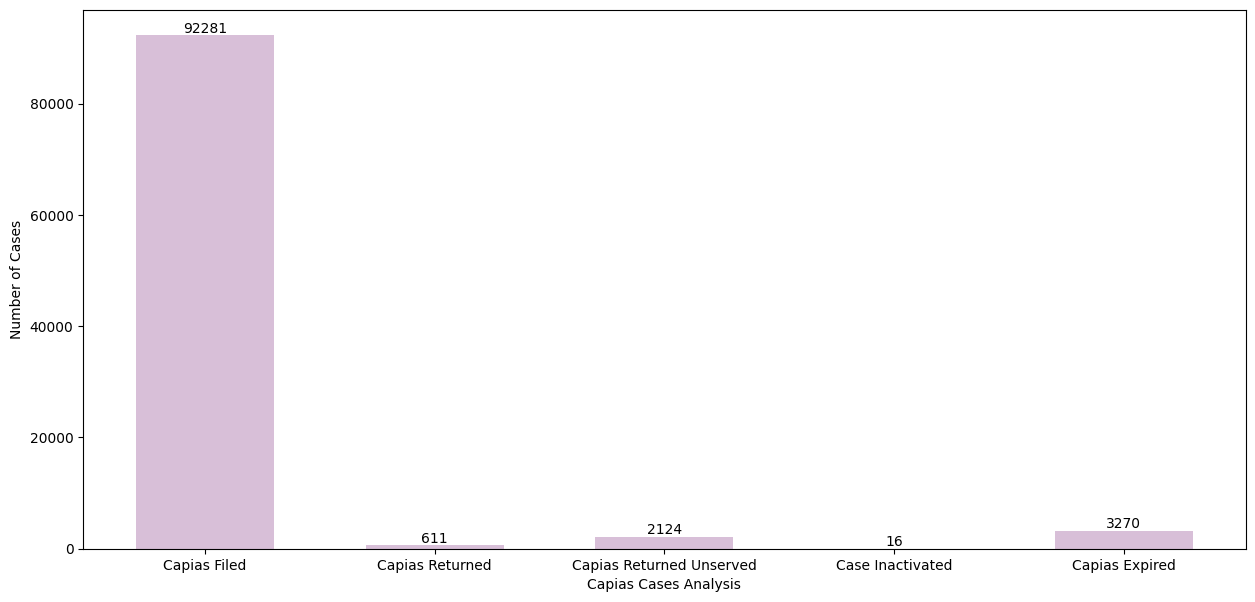

In [169]:
import numpy as np
import matplotlib.pyplot as plt

courses = ['Capias Filed', 'Capias Returned', 'Capias Returned Unserved', 'Case Inactivated', 'Capias Expired']
values = [ncc_debt_totcap, ncc_debt_capret, ncc_debt_capretuns, ncc_debt_capinact, ncc_debt_capexp]

# Create the figure with a specified size first
fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(courses, values, color='thistle', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Capias Cases Analysis")
plt.ylabel("Number of Cases")
# plt.title("Special Case Analysis")
plt.show()

Bankruptcy

In [170]:
bquery1 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%bankruptcy%'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(bquery1) # executing query

bresults1 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [171]:
bankr = pd.DataFrame (bresults1)
bankr

,0
0,8844
1,11513
2,15501
3,15772
4,16484
...,...
30335,104678429
30336,105077059
30337,105368420
30338,105738967


In [172]:
wquery1 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%wage%'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(wquery1) # executing query

wresults1 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


In [173]:
debt_set = set(df['case_id'].tolist())
bankr_set=set(bankr[0].tolist())
cc_debt_bankr = bankr_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_bankr = len(bankr_set)
ncc_debt_bankr = len(cc_debt_bankr)
print("Number of total debt cases: ", ncc_debt)
print("Number of capias expired cases: ", ncc_bankr)
print("Number of common cases between debt and capias expired cases: ", ncc_debt_bankr)
print("Percentage of capias expired cases that are debt case: ", (ncc_debt_bankr/ncc_bankr)*100)

Number of total debt cases:  520356
Number of capias expired cases:  30340
Number of common cases between debt and capias expired cases:  7903
Percentage of capias expired cases that are debt case:  26.04812129202373


In [174]:
wage = pd.DataFrame (wresults1)
wage

,0
0,11373
1,11392
2,11413
3,11435
4,11460
...,...
26029,106185915
26030,106187807
26031,106188786
26032,106192758


In [175]:
debt_set = set(df['case_id'].tolist())
wage_set=set(wage[0].tolist())
cc_debt_wage = wage_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_wage = len(wage_set)
ncc_debt_wage = len(cc_debt_wage)
print("Number of total debt cases: ", ncc_debt)
print("Number of capias expired cases: ", ncc_wage)
print("Number of common cases between debt and capias expired cases: ", ncc_debt_wage)
print("Percentage of capias expired cases that are debt case: ", (ncc_debt_wage/ncc_wage)*100)

Number of total debt cases:  520356
Number of capias expired cases:  26034
Number of common cases between debt and capias expired cases:  9921
Percentage of capias expired cases that are debt case:  38.10785895367596


In [176]:
cc_debt_bankr = bankr_set.intersection(debt_set)
cc_debt_bankr_totcap = cc_debt_bankr.intersection(cc_debt_totcap)
cc_debt_bankr_totdef = cc_debt_bankr.intersection(cc_debt_totdef)
cc_debt_bankr_totwage = cc_debt_bankr.intersection(cc_debt_wage)
ncc_debt_bankr = len(cc_debt_bankr)
ncc_debt_bankr_totcap = len(cc_debt_bankr_totcap)
ncc_debt_bankr_totdef = len(cc_debt_bankr_totdef)
ncc_debt_bankr_totwage = len(cc_debt_bankr_totwage)
print("Number of common cases between debt and bankruptcy cases: ", ncc_debt_bankr)
print("Number of common cases between capias and capias expired cases: ", ncc_debt_bankr_totcap)
print("Number of common cases between debt and capias expired cases: ", ncc_debt_bankr_totdef)
print("Number of common cases between debt and capias expired cases: ", ncc_debt_bankr_totwage)

Number of common cases between debt and bankruptcy cases:  7903
Number of common cases between capias and capias expired cases:  1497
Number of common cases between debt and capias expired cases:  1416
Number of common cases between debt and capias expired cases:  174


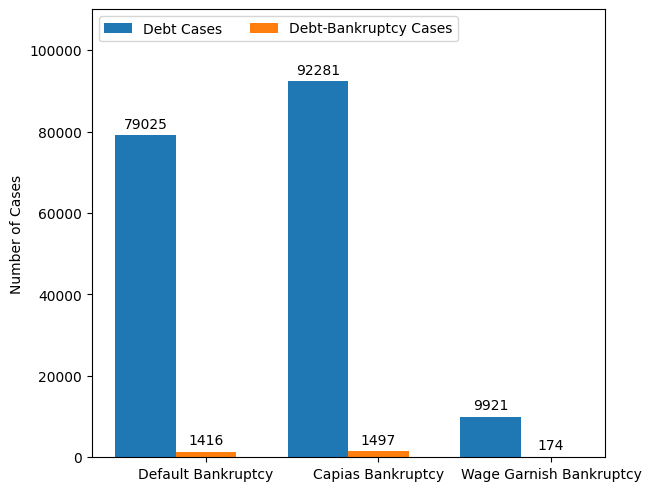

In [182]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Default Bankruptcy", "Capias Bankruptcy", "Wage Garnish Bankruptcy")
penguin_means = {
    'Debt Cases': (ncc_debt_totdef, ncc_debt_totcap, ncc_debt_wage),
    'Debt-Bankruptcy Cases': (ncc_debt_bankr_totdef, ncc_debt_bankr_totcap, ncc_debt_bankr_totwage),
}

x = np.arange(len(species))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
# ax.set_title('Bankruptcy Analysis')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 110000)

plt.show()

WAGE GARNISH

LIST OF ACTION FOR DEFAULT

In [ ]:
# # database connection
# cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
#                               host='masscourtsplus.org',
#                               database='civica_courtdocs')

# cursor = cnx.cursor()

In [185]:
lquery1 =  """
SELECT action, case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
"""

%time

cursor.execute(lquery1) # executing query

lresults1 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.2 µs


In [186]:
defl = pd.DataFrame (lresults1)
defl

,0,1
0,Default,5481
1,Judgment,5481
2,Default,5487
3,Judgment,5487
4,Default,5505
...,...,...
5490349,Event resulted,106002812
5490350,Event scheduled,106005007
5490351,Event resulted,106005007
5490352,Event scheduled,106005083


In [187]:
debt_set = set(df['case_id'].tolist())
filtered_df = defl[defl[1].isin(debt_set)]

# Count unique values in column0
result = filtered_df[0].value_counts()
filtered_df

,0,1
471,Event scheduled,13070
472,Event resulted,13070
487,,13476
488,Event scheduled,13476
489,Event scheduled,13476
...,...,...
5490215,,102328745
5490330,Event scheduled,102330107
5490331,,102330107
5490338,Event scheduled,102333198


LIST OF ACTION FOR CAPIAS

In [188]:
lquery2 =  """
SELECT action, case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%capias%'
"""

%time

cursor.execute(lquery2) # executing query

lresults2 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs


In [189]:
capiasl = pd.DataFrame (lresults2)
capiasl

,0,1
0,Capias,5464
1,Case inactivated,5464
2,No capias returned,5464
3,Capias expired,5464
4,Capias,5481
...,...,...
2243907,Capias,102332660
2243908,Capias,102332667
2243909,Capias,102332674
2243910,Capias,102333198


In [190]:
filtered_capiasl = capiasl[capiasl[1].isin(df['case_id'])]
filtered_capiasl 

,0,1
334,Capias,13722
335,Debtor before the court,13722
338,Capias,13826
339,Debtor before the court,13826
397,Capias,16030
...,...,...
2243890,Event scheduled,102329907
2243891,Event resulted,102329907
2243892,Default,102329907
2243893,Capias,102329907


In [194]:
filtered_capiasl_unique = filtered_capiasl.drop_duplicates()
filtered_capiasl_unique

,0,1
334,Capias,13722
335,Debtor before the court,13722
338,Capias,13826
339,Debtor before the court,13826
397,Capias,16030
...,...,...
2243890,Event scheduled,102329907
2243891,Event resulted,102329907
2243892,Default,102329907
2243893,Capias,102329907


In [191]:
counts = filtered_capiasl[0].value_counts().rename_axis('unique_values').reset_index(name='counts')
final_data = pd.merge(filtered_capiasl, counts, left_on=0, right_on='unique_values', how='left').fillna(0)
final_data = final_data[[0, 'counts']]
final_data

,0,counts
0,Capias,102412
1,Debtor before the court,15988
2,Capias,102412
3,Debtor before the court,15988
4,Capias,102412
...,...,...
167912,Event scheduled,4876
167913,Event resulted,1408
167914,Default,6799
167915,Capias,102412


LIST OF ACTION FOR WAGE GARNISH

In [192]:
lquery3 =  """
SELECT action, case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%wage%'
"""

%time

cursor.execute(lquery3) # executing query

lresults3 = cursor.fetchall() # fetching result

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


In [193]:
wagel = pd.DataFrame (lresults3)
wagel

,0,1
0,Event cancelled,6755
1,Event cancelled,6777
2,Motion to attach by trustee pr,11373
3,Motion to attach by trustee pr,11392
4,Motion to attach by trustee pr,11413
...,...,...
88532,Affidavit filed,106188786
88533,,106192758
88534,,106197745
88535,,102328274


Percentage of Default Judgement to Default Filed:  130.63334387851947
Percentage of Motion to Remove Default to Default Filed:  3.390066434672572
Percentage of Default Removed to Default Filed:  0.21006010756089843


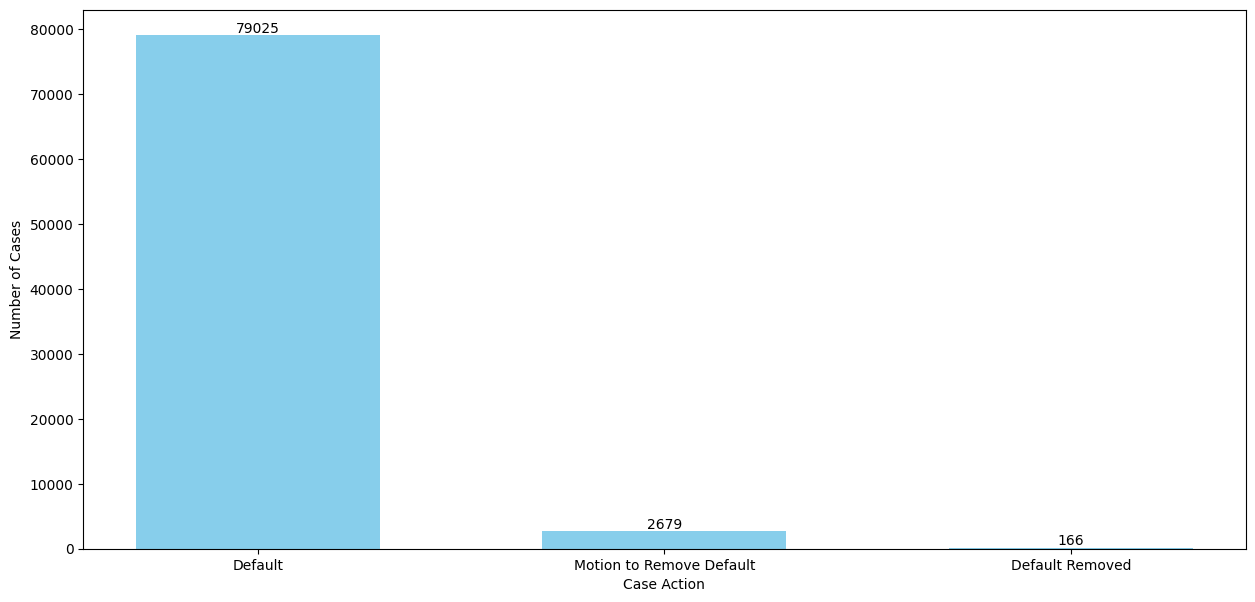

In [195]:
import numpy as np
import matplotlib.pyplot as plt

per_ncc_debt_defjud= (ncc_debt_defjud/ncc_debt_totdef)*100
per_ncc_debt_defmotrm= (ncc_debt_defmotrm/ncc_debt_totdef)*100
per_ncc_debt_defrmed= (ncc_debt_defrmed/ncc_debt_totdef)*100

print("Percentage of Default Judgement to Default Filed: ", per_ncc_debt_defjud)
print("Percentage of Motion to Remove Default to Default Filed: ", per_ncc_debt_defmotrm)
print("Percentage of Default Removed to Default Filed: ", per_ncc_debt_defrmed)

categories = ['Default', 'Motion to Remove Default', 'Default Removed']
values = [ncc_debt_totdef, ncc_debt_defmotrm, ncc_debt_defrmed]

fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(categories, values, color='skyblue', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Case Action")
plt.ylabel("Number of Cases")
plt.show()

In [196]:
query5 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE action = 'Motion for default judgment'
AND date_time >= '2013-01-01 00:00:00'
"""

%time

cursor.execute(query5) # executing query

results5 = cursor.fetchall() # fetching result

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 14.8 µs


In [197]:
deffiled = pd.DataFrame (results5)
deffiled

,0
0,11156
1,11181
2,11596
3,11615
4,11633
...,...
93595,102449999
93596,102450042
93597,102330496
93598,102329564


In [198]:
debt_set = set(df['case_id'].tolist())
deffiled_set=set(deffiled[0].tolist())
cc_debt_deffiled = deffiled_set.intersection(debt_set)
ncc_debt = len(debt_set)
ncc_deffiled = len(deffiled_set)
ncc_debt_deffiled = len(cc_debt_deffiled)
print("Number of total debt cases: ", ncc_debt)
print("Number of total capias cases: ", ncc_deffiled)
print("Number of common cases between debt and capias cases: ", ncc_debt_deffiled)
print("Percentage of capias cases that are debt case: ", (ncc_debt_deffiled/ncc_deffiled)*100)

Number of total debt cases:  520356
Number of total capias cases:  93600
Number of common cases between debt and capias cases:  32428
Percentage of capias cases that are debt case:  34.64529914529915


Percentage of Default Judgement to Default Filed:  130.63334387851947
Percentage of Motion to Remove Default to Default Filed:  3.390066434672572
Percentage of Default Removed to Default Filed:  0.21006010756089843


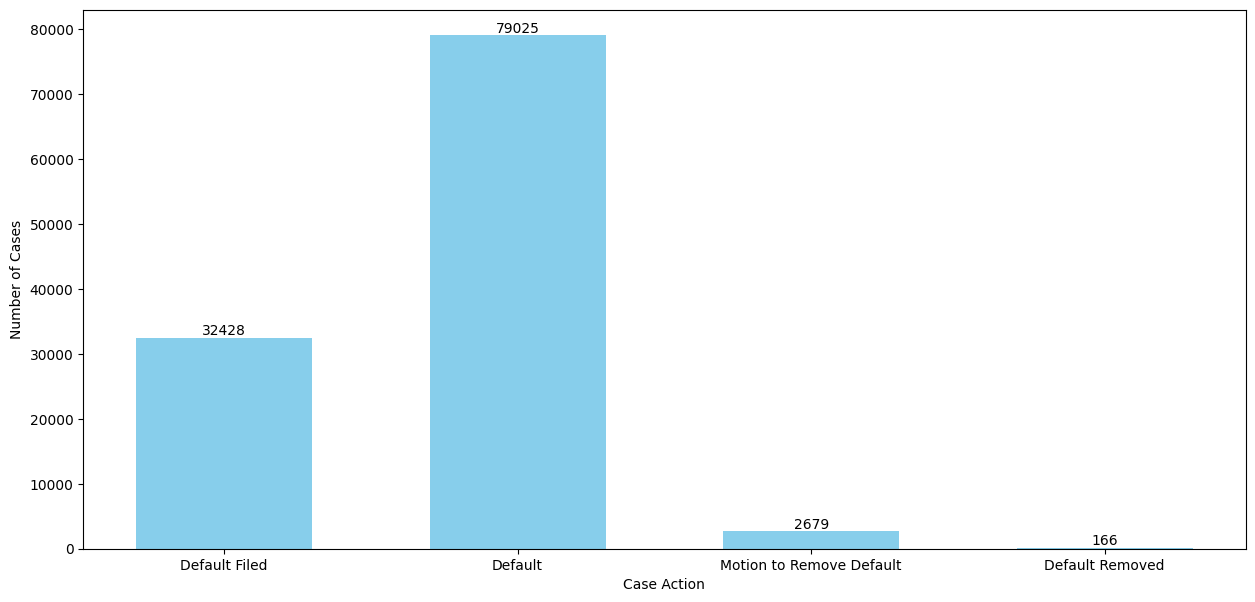

In [199]:
import numpy as np
import matplotlib.pyplot as plt

per_ncc_debt_defjud= (ncc_debt_defjud/ncc_debt_totdef)*100
per_ncc_debt_defmotrm= (ncc_debt_defmotrm/ncc_debt_totdef)*100
per_ncc_debt_defrmed= (ncc_debt_defrmed/ncc_debt_totdef)*100

print("Percentage of Default Judgement to Default Filed: ", per_ncc_debt_defjud)
print("Percentage of Motion to Remove Default to Default Filed: ", per_ncc_debt_defmotrm)
print("Percentage of Default Removed to Default Filed: ", per_ncc_debt_defrmed)

categories = ['Default Filed', 'Default', 'Motion to Remove Default', 'Default Removed']
values = [ncc_debt_deffiled, ncc_debt_totdef, ncc_debt_defmotrm, ncc_debt_defrmed]

fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(categories, values, color='skyblue', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Case Action")
plt.ylabel("Number of Cases")
plt.show()